# Final assignment of “Management and Analysis of Physics Datasets” - Part 2

## Dr. Andreas-Joachim Peters - CERN

Student: Nguyen Xuan Tung 

ID: 2005491

## Table of Contents

* [Assignment 0: Fun exercise](#chapter0)
* [Assignment 1: Redundancy ](#chapter1)
    * [Section 1.1](#section_1_1)
    * [Section 1.2](#section_1_2)
    * [Section 1.3](#section_1_3)
    * [Section 1.4](#section_1_4)
    * [Section 1.5](#section_1_5)
* [Assignment 2: Cryptography](#chapter2)
    * [Section 2.1](#section_2_1)
    * [Section 2.2](#section_2_2)
* [Assignment 3: Object Storage](#chapter3)
    * [Section 3.1](#section_3_1)
       * [Sub section 3.1.a](#subsection_3_1_a)
       * [Sub section 3.1.b](#subsection_3_1_b)
    * [Section 3.2](#section_3_2)    
    * [Section 3.3](#section_3_3)    
    * [Section 3.4](#section_3_4)    
* [Assignment 4: Rest APIs & Block Chain Technology ](#chapter4)
    * [Section 4.1](#section_4_1)
       * [Sub section 4.1.1](#subsection_4_1_1)
       * [Sub section 4.1.2](#subsection_4_1_2)
    * [Section 4.2](#section_4_2)    
       * [Sub section 4.2.1](#subsection_4_2_1)
       * [Sub section 4.2.2](#subsection_4_2_2)
       * [Sub section 4.2.3](#subsection_4_2_3)
       * [Sub section 4.2.4](#subsection_4_2_4)
       * [Sub section 4.2.5](#subsection_4_2_5)

## 0. Fun exercise <a class="anchor" id="chapter0"></a>

 1 + 2 = 3
 
 2 + 5 = 7
 
 3 + 7 = 4 
 
 4 + 5 = ?
 
 5 + 9 = 12
 

You might have seen this kind of puzzles on social media. It should be
straight-forward for you to understand which operations connect the two
numbers before the = sign. What is the result of the field ? Show proof
for each line!

Rewrite the digit as binary: 

    0000 = 0
    
    0001 = 1
    
    0010 = 2
    
    0011 = 3
    
    0100 = 4
    
    0101 = 5
    
    0110 = 6
    
    0111 = 7
    
    1000 = 8
    
    1001 = 9
    
    1010 = 10
    
    1011 = 11
    
    1100 = 12
    
The puzzule will be:

    0001 + 0010 = 0022   1 + 2 = 3
    
    0010 + 0101 = 0111   2 + 5 = 7
    
    0011 + 0111 = 0100   3 + 7 = 4
    
    0100 + 0101 = 0001   4 + 5 = ?
    
    0101 + 1001 = 1100   5 + 9 = 12
    
 001 = 1 so 4 + 5 = 1   

The result: 
 
 1 + 2 = 3
 
 2 + 5 = 7
 
 3 + 7 = 4 
 
 4 + 5 = 1
 
 5 + 9 = 12

## 1. Redundancy<a class="anchor" id="chapter1"></a>

We are programming a file based RAID-4 software algorithm. For this
purpose we are converting a single input (raid4.input) file into four data
files raid4.0,raid4.1,raid4.2,raid4.3 and one parity file
raid4.4 - the four data and one parity file we call ‘stripe files’.

The input file can be downloaded from:

http://apeters.web.cern.ch/apeters/pd2021/raid4.input

To do this we are reading in a loop sequentially blocks of four bytes from the input
file until the whole file is read:

• in each loop we write one of the four read bytes round-robin to each data file,
compute the parity of the four input bytes and write the result into the fifth parity
file. ( see the drawing for better understanding )

• we continue until all input data has been read. If the last bytes read from the input
file are not filling four bytes, we consider the missing bytes as zero for the parity
computation.

In [10]:
import numpy as np

def get_arr(path): # function get the file as an array
    with open(path,'r+b') as file:
        v = np.frombuffer(file.read(),dtype = np.uint8)
    return v


def post_arr(arr, path): # function write array to file, convert to bytes
    with open(path,'w+b') as file:
        file.write(arr.tobytes())
    return


def xor_arr(matrix):# function applies the bitwise xor function to a collection of arrays, given as rows in a matrix
    # Neutral xor array
    v = np.zeros(len(matrix[0]),dtype = np.uint8)
    # Applying bitwise_xor between the matrix rows
    for arr in matrix:
        v = np.bitwise_xor(v,arr)
    return v

### 1.1 Write a program (C,C++, R or Python), which produces four striped data and one parity file as described above using the given input file hint: if you have a problem programming this yourself, you can download the core program in C++ from from http://apeters.web.cern.ch/apeters/pd2021/raid4.c <a class="anchor" id="section_1_1"></a>

In [11]:
n = 4
src_file = 'raid4.input'
all_bytes = get_arr(src_file)
all_bytes

# We calculate how many zeros have to be added in the end
extra = n - len(all_bytes)%n
bytes_arr = np.hstack([all_bytes,np.zeros(extra, dtype = np.uint8)])

# Reshaping array
nrows = len(bytes_arr)//n
ncols = n
bytes_arr = bytes_arr.reshape((nrows,ncols))
## Rendered as unsigned integers of 8 bits.
bytes_arr

array([[ 37,  80,  68,  70],
       [ 45,  49,  46,  51],
       [ 10,  37, 196, 229],
       ...,
       [ 55,  55,  51,  55],
       [ 10,  37,  37,  69],
       [ 79,  70,  10,   0]], dtype=uint8)

In [12]:
# Iterate over the columns and generate the files
for i, v in enumerate(bytes_arr.T):
    post_arr(v, f'raid{n}.{i}')

# Evaluating parity between stripes
row_p = xor_arr(bytes_arr.T)

#Store the row parity
post_arr(row_p,f'raid{n}.{n}')

In [13]:
## Unsigned 8bit integer representation of the parity stripe
row_p.T

array([119,   1,  14, ...,   4,  79,   3], dtype=uint8)

### 1.2 Extend the program to compute additionally the parity of all bytes  within one stripe file.<a class="anchor" id="section_1_2"></a>

In [14]:
overhead = len(row_p)*5/len(all_bytes)-1
overhead *= 100
print(f'The size overhead is {round(overhead,2)}%')

The size overhead is 25.0%


In [15]:
# We now wish to generate an extra file with the parity of each column
ext_bytes = np.vstack((bytes_arr.T, row_p)).T

# Evaluating parity for each stripe
col_p = xor_arr(ext_bytes)

# Store the resulting parity
post_arr(col_p,f'raid{n}.col')

You can say, that the computed column-wise parity acts as a **corruption check** for each stripe file. Compute the size overhead by comparing the size of all 5 stripe files with the original file. Compute the size 
overhead by comparing the size of all 5 stripe files with the original file.  
The size overhead is **25.0%** ! 

### 1.3 What is the 5-byte parity value if you write it it in hexadecimal format like P5  =0x[q0][q1][q2][q3][q4], where the [qx] are the hexadecimal parity bytes computed by xor-ing all bytes in each stripe file.  A byte in hexadecimal has two digits and you should add leading 0 if necessary.<a class="anchor" id="section_1_3"></a>

In [16]:
p5 = [str(i.tobytes()).split('x')[1][:-1] for i in col_p]
p5 = '0x'+'_'.join(p5)
print(f'The 5-parity value if we write it it in hexadecimal format like P5 =0x[q0][q1][q2][q3][q4]: {p5}')



The 5-parity value if we write it it in hexadecimal format like P5 =0x[q0][q1][q2][q3][q4]: 0xa5_07_a0_9c_9e


### 1.4 If you create a sixth stripe file, which contains the row-wise parities of the five stripe files, what would be the contents of this file?  <a class="anchor" id="section_1_4"></a>

### Write down the equation for R, which is the XOR between all data stripes D0,D1,D2,D3 and the parity P. Remember P was the parity of D0,D1,D2,D3! Reduce the equation removing P from it to get the answer about the contents! 

R = $D_0$ $\bigoplus$ $D_1$ $\bigoplus$ $D_2$ $\bigoplus$ $D_3$ $\bigoplus$ P
  
  = P $\bigoplus$ P
  
  = 0

### 1.5 After some time you recompute the 5-byte parity value as in 1.3. Now the result is P5 = 0x a5 07 a0 01 9e. Something has been corrupted. You want to reconstruct the original file raid4.input using the 5 stripe files.  Describe how you can recreate the original data file. Which stripe files do you use and how do you recreate the original data file with the correct size?<a class="anchor" id="section_1_5"></a>

In [17]:
def correct(col_parity, new_col_parity, file_key):
    # Both col_p and new_col_p are expected as bytes objects
    col_p = np.frombuffer(bytes(col_parity),dtype = np.uint8)
    new_p = np.frombuffer(new_col_parity,dtype = np.uint8)
    mask = col_p != new_p

    # How many parity values have changed?
    wrong = np.arange(len(col_p))[mask]
    right = np.arange(len(col_p))[~mask]
    
    # We cannot correct if more than one stripe is damaged or no stripe damage was detected.
    if len(wrong) != 1:
        message = 'More than one stripe has corrupted elements. Nothing can be done.'\
            if wrong else 'Nothing to correct.'
        print(message)
        return None    

    # If only one stripe is damaged then we can proceed to bit correction.
    # Retrieve as an array of row vectors those stripes to be evaluated
    w = np.vstack([get_arr(f'{file_key}.{i}') for i in right])
    v = xor_arr(w)
    
    # Time to correct
    [j] = wrong
    path = f'{file_key}.{j}'
    post_arr(v,path)
    print(f'Successfully rewrote {path}')
    
    return v

In [18]:
p5 = 0xa5_07_a0_01_9e.to_bytes(5,'big')
p5

b'\xa5\x07\xa0\x01\x9e'

In [19]:
correct(bytes(col_p),p5,'raid4')

Successfully rewrote raid4.3


array([ 70,  51, 229, ...,  55,  69,   0], dtype=uint8)

## 2. Cryptography <a class="anchor" id="chapter2"></a>

The Caesar cipher is named for Julius Caesar, who
used an alphabet where decrypting would shift three
letters to the left.

A friend has emailed you the following text:
K]amua!trgpy

She told you that her encryption algorithm works
similar to the Caesar cipher:
    
• to each ASCI value of each letter I add a secret key
value.
(note that ASCII values range from 0 to 255)

• additionally to make it more secure I add a variable (so called) nonce
value to each ASCII number.

The nonce start value is 5 for the first character of the message. For each
following character add 1 to the nonce of the previous character, e.g. for
the second letter the nonce added is 6, for the third letter it is 7 aso. 


### 2.1  Is this symmetric or asymmetric encryption and explain why?<a class="anchor" id="section_2_1"></a>


This is symmetric encryption because the sender and the receiver only need the public key just containing the information about the shifts of the characters.

### 2.2 Write a small brute force program which tests keys from 0..255 and use a dictionary approach to figure out the original message. In Python you can use the ord() function to get an integer representation of a character and the chr() to retrieve a character string from an integer! <a class="anchor" id="section_2_2"></a>

In [1]:
#!pip install pyenchant
import re, string, enchant
d = enchant.Dict("en_US")

In [2]:
def reshift(letter,ascimin,ascimax): #decrypt method function
    if ord(letter) < ascimin:
        return chr(ord(letter) - ascimin + ascimax + 1)
    elif ord(letter) > ascimax:
        return chr(-ascimax + ord(letter) + ascimin - 1)
    else:
        return letter

def decrypt(mex,nonce0,shift,ascimin,ascimax): #decryption function
    word = []
    nonce = nonce0 #choose nonce0 as the starting value
    
    for letter in mex:
        shiftedchr = chr(ord(letter) - nonce + shift) #nonce must be negative in decrypting
        correctedshiftedchr = reshift(reshift(shiftedchr,ascimin,ascimax),ascimin,ascimax)
        word.append(correctedshiftedchr)
        nonce = nonce + 1 
        
    return word

def stringtowords(phrase): #decrypt setting proposal function    
    clear_word = ''
    for char in phrase:
        if char not in string.punctuation:
            clear_word += char
    return clear_word.lower().split()

In [3]:
ascimax = 255
ascimin = 0
origin = 'K]amua!trgpy'
nonce0 = 5

for i in range(ascimin,ascimax):
    decrypted = decrypt(origin,nonce0,i,ascimin,ascimax)
    words = stringtowords(decrypted)
    for word in words:
        if len(word) != 1:
            try:
                d.check(word)
                if d.check(word) == True:
                    print(i,':',' '.join(words))
            except:
                pass

10 : padova rocks
246 : mpbm ow


The used key is **10**, the original message text is **Padova rocks!**


## 3. Object Storage Technology<a class="anchor" id="chapter3"></a>

In an object storage system we are mapping objects by name to locations
using a hash table.

Imagine we have a system with ten hard disks (10 locations). We
enumerate the location of a file using an index of the hard disk [0..9]. 

Our hash algorithm for placement produces hashes, which are distributed
uniform over the value space for a flat input key distribution.

We want now to simulate the behaviour of our hash algorithm without
the need to actually compute any hash value.

Instead of using real filenames, which we would hash and map using a
hash table to a location (as we did in the exercise), we are ‘computing’ a
location for ‘any’ file by generating a random number for the location
in the range [0..9] to assign a file location. To place a file in the storage
system we use this random location where the file will be stored and
consumes space. 

Assume each disk has 1TB of space, we have 10TB in total.

Place as many files of 10GB size as possible to hard disks choosing
random locations until one hard disk is full.

Hint: a hard disk is full once you have stored hundred 10GB files.

### 3.1 Write a program in Python, R or using ROOT, which simulates the placement of 10GB files to random locations and account the used space on each hard disk. Once the first hard disk is full, you stop to place files. <a class="anchor" id="section_3_1"></a>

Remark: the distribution changes every time if the random 
generator is not seeded always with the same start value. 
Nevertheless both ways are accepted! 

In [23]:
#!pip install psutil

In [28]:
import psutil
import matplotlib.pyplot as plt
import numpy as np
from numba import njit
import random
import math

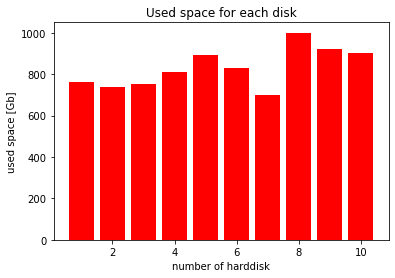

In [39]:
def fill_disks(disk_size, n_disks):
    disks=np.zeros(n_disks)
    while(not any((math.floor(d))==1000 for d in disks)):
        disks[random.randint(0, n_disks-1)]+=disk_size
    return disks

random.seed(3091998) 
disk_size1=10       #Gb

x=np.arange(1,11)
disks1 = fill_disks(disk_size1, 10)
plt.bar(x,disks1,color='red')
plt.xlabel('number of harddisk')
plt.ylabel('used space [Gb]')
plt.title('Used space for each disk')
plt.show()



#### 3.1.a How many files did you manage to place?  <a class="anchor" id="subsection_3_1_a"></a>

In [42]:
placed_files = sum(disks1)/disk_size1
print(f'{placed_files} files were successfully managed to place.')

830.0 files were successfully managed to place.


#### 3.1.b What is the percentage of total used space on all hard disks in the moment the first disk is full<a class="anchor" id="subsection_3_1_b"></a>

In [37]:
used_percentage = round(sum(disks1)/10000*100,2)
print(f'{used_percentage}% of the used space on all hard disks in the moment the first disk is full.')

83.0% of the used space on all hard disks in the moment the first disk is full.


### 3.2 Repeat the same task placing 1GB files until the first hard disk is full.  <a class="anchor" id="section_3_2"></a>

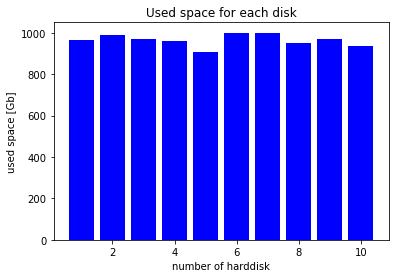

In [38]:
random.seed(19061998) #set the seed
disk_size2=1     #Gb

disks2 = fill_disks(disk_size2, 10)
plt.bar(x,disks2,color = 'blue')
plt.xlabel('number of harddisk')
plt.ylabel('used space [Gb]')
plt.title('Used space for each disk')
plt.show()


#### 3.2.a How many files did you manage to place?<a class="anchor" id="subsection_3_2_a"></a>

In [40]:
placed_files = sum(disks2)/disk_size2
print(f'{placed_files} files were successfully managed to place.')

9643.0 files were successfully managed to place.


#### 3.2.b What is the percentage of total used space on all hard disks in the moment the first disk is full? <a class="anchor" id="subsection_3_2_b"></a>

In [43]:
used_percentage = round(sum(disks2)/10000*100,2)
print(f'{used_percentage}% of the used space on all hard disks in the moment the first disk is full.')

96.43% of the used space on all hard disks in the moment the first disk is full.


### 3.3 Based on this observation: why do you think object storage typically stores fixed size blocks of 4M and not files of GBs size as a whole?  ( so called block storage approach )  

### Run the same program for 4M block sizes and demonstrate the benefits <a class="anchor" id="section_3_3"></a>

In block storage, as the file size is smaller, a bigger fraction of the fullest disk can be used before stopping and a small block size will result in a lot of chunks to be stored. When using smaller blocks will give the number of files is greater for a given size. 

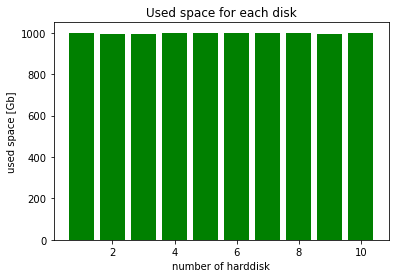

In [44]:
random.seed(15102021) #set the seed
disk_size3=0.004     #Gb

disks3 = fill_disks(disk_size3, 10)
plt.bar(x,disks3,color='green')
plt.xlabel('number of harddisk')
plt.ylabel('used space [Gb]')
plt.title('Used space for each disk')
plt.show()

### 3.4 Compute the average used space on all hard disks and the standard deviation for the average used space for 10 GB and 1GB and 4M files. 

### How is the standard deviation correlated to the block size and why?  

### If we now repeat such an experiment for many more (thousands) of hard disks, which kind of distribution do you get when you do a histogram of the used space of all hard disks?  <a class="anchor" id="section_3_4"></a>

In [48]:
import dask as dk

In [49]:
x = fill_disks(disk_size1, 500)
y = fill_disks(disk_size2, 500)

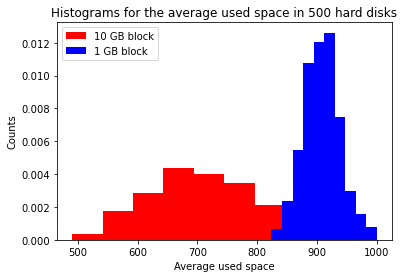

In [50]:
#plots
plt.hist(x, label='10 GB block', density=True, color='red')
plt.hist(y, label='1 GB block', density=True, color='blue')

plt.title('Histograms for the average used space in 500 hard disks')
plt.xlabel('Average used space')
plt.ylabel('Counts')
plt.legend()
plt.show()



In [51]:
print('Results for 10 disks:')
print('averaged used space with 10 GB data block: ',np.mean(disks1),'/ 1000 GB')
print('averaged used space with 1 GB data block: ', np.mean(disks2),'/ 1000 GB')
print('averaged used space with 4 MB data block: ', round(np.mean(disks3),1),'/ 1000 GB')
print('stddev for average used space with 10 GB data block: ', round(np.std(disks1),2),'GB')
print('stddev for average used space with 1 GB data block: ',  round(np.std(disks2),2),'GB')
print('stddev for average used space with 4 MB data block: ',  round(np.std(disks3),2),'GB')

Results for 10 disks:
averaged used space with 10 GB data block:  830.0 / 1000 GB
averaged used space with 1 GB data block:  964.3 / 1000 GB
averaged used space with 4 MB data block:  997.2 / 1000 GB
stddev for average used space with 10 GB data block:  90.66 GB
stddev for average used space with 1 GB data block:  27.29 GB
stddev for average used space with 4 MB data block:  2.26 GB


## 4. REST APIs and Block Chain Technology<a class="anchor" id="chapter4"></a>

Under https://pansophy.app:8443 you find a Crypto Coin Server exporting a simple Block Chain.

You can open this URL in any web browser to see the current Block Chain status and the account information. At the time of writing the initial birth account of the Block Chain contained 1M coins ( “genesis” : 1000000 ) :



The REST responses are given in JSON format. Our REST API uses secure HTTP protocol and it is based on two HTTP methods:

GET

POST

GET requests are used, to retrieve any kind of information, POST requests are used to change state in the server.

The task is to implement a client and use a simple REST API to submit transactions to the Block Chain. Your goal is to book coins from other people’s accounts to your own account. The server implements a Proof Of Time algorithm. To add a transaction to move coins to your account, you have to submit a merit request and you have to let time pass before you can send a claim request to execute your transaction on the Block Chain. If you claim your transaction too fast after a merit request, your request is discarded. The server enforces a Proof Of Time of a minimum of 10 seconds!

In [1]:
import os
import json
import time
import requests
import numpy as np
import multiprocessing

In [2]:
url = 'https://pansophy.app:8443/'
client = 'Tung'

### 4.1 <a class="anchor" id="section_4_1"></a>

#### 4.1.1 Use the REST API  and the curl command to transfer coins of the genesis or any other account on your own team account. You can use the -d option to POST a document. You have to indicate in your request, that the content type of the document is JSON. To do this you can add an HTTP header for this command:

 curl ... -H”Content-Type: application/json” ... <a class="anchor" id="subsection_4_1_1"></a>

In [56]:
r_1 = requests.get(url, verify=False)

#r_1.json()

data = {"operation": "merit",
        "team": "Tung",
        "coin": 100,
        "stealfrom": "famafiano"}

r_2 = requests.post(url, json=data, verify=False)

#r_2.json()



claim = {"operation": "claim",
         "team": "Tung"}

r_3 = requests.post(url, json=claim, verify=False)

#r_3.json()

/home/locp/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/locp/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/locp/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


In [57]:
for i in range(100):
    r_2 = requests.post(url, json=data, verify=False)
    r_2.text
    time.sleep(10)
    r_3 = requests.post(url, json=claim, verify=False)



/home/locp/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/locp/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/locp/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/locp/anaconda3/lib/python3.8/site-packages/

/home/locp/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/locp/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/locp/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/locp/anaconda3/lib/python3.8/site-packages/

/home/locp/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/locp/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/locp/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/locp/anaconda3/lib/python3.8/site-packages/

/home/locp/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/locp/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/locp/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/locp/anaconda3/lib/python3.8/site-packages/

/home/locp/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/locp/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/locp/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/locp/anaconda3/lib/python3.8/site-packages/

/home/locp/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/locp/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/locp/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/locp/anaconda3/lib/python3.8/site-packages/

/home/locp/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/locp/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/locp/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/locp/anaconda3/lib/python3.8/site-packages/

/home/locp/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/locp/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/locp/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/locp/anaconda3/lib/python3.8/site-packages/

#### 4.1.2 What is the maximum number of transactions one given team can add to the Block Chain in one day? <a class="anchor" id="subsection_4_1_2"></a>

The Proof Of Time is set to a minimum of 10 seconds, so in one day one can make: 
    
    Max_number_transaction = (number_second_in_a_day)/(Proof_of_time) = 86400/10 = 8640

### 4.2 The server has a function to compute a hash of a block in the Block Chain: <a class="anchor" id="section_4_2"></a>

In [4]:
import hashlib

def calculate_hash(index,team,prev_hash,coins,timestamp):
    block_of_string = "{}{}{}{}{}".format(index,
                                          team,
                                          prev_hash,
                                          coins,
                                          timestamp)
    
    return hashlib.sha256(block_of_string.encode()).hexdigest()

calculate_hash(6484,'Tung',"69a09552f53fefa586cfa7784574ad9fdb3b09ce842ae7b8c605df2310628e83",30000,1636572033.345286)



'44a4532c9404c8536ae691bb6d65b57c69180f424a435a2a49d46e68f95984d8'

#### 4.2.1 Explain what this function does and why is this ‘the key’ for Block Chain technology?  <a class="anchor" id="subsection_4_2_1"></a>

The function calculate_hash creates the next hash in the chain. Each block of the blockchain contains the hashstring for the previous block and for itself. This will let us navigate in the blockchain through this reference method.

#### 4.2.2 If you have the knowledge of the hash function, how can you validate the contents of the Block Chain you received using a GET request to make sure, nobody has tampered with it? You don’t need to implement it! Explain the algorithm to validate a Block Chain! <a class="anchor" id="subsection_4_2_2"></a>

We have variables (index, team, prev_hash, coins, timestamp) inside each block. The hash secures the block chain because a small change in a block will give the different result as different hash. 

#### 4.2.3 Why might the GET REST API run into scalability problems? Express the scalability behaviour of execution times of GET and POST requests in Big O notation in relation to the number of transactions recorded in the Block Chain! Draw execution time vs transactions for GET and POST requests<a class="anchor" id="subsection_4_2_3"></a>

GET is scaled as 0(n) and it reads the whole document. It will take longer time as the file is big so the execution time is scaled as 0(1)

#### 4.2.4 If the Crypto server goes down, the way it is implemented it loses the current account balances. How can the server recompute the account balances after a restart from the saved Block Chain? <a class="anchor" id="subsection_4_2_4"></a>

The blockchain will stop synchronizing in the event of an internet shutdown. The ledgers will immediately stop recording bitcoin transactions, leading to a temporary break in transaction processing. The network will resume if the transactions are consistent. If the account balances are suddenly lost, the server can perform a sweep over all the blocks in the chain and recompute all the transactions. 

#### 4.2.5 What are the advantages of using a REST API and JSON in a client-server architecture? What are possible disadvantages? <a class="anchor" id="subsection_4_2_5"></a>

- Advantages: Scalability. This protocol stands out due to its scalability. Thanks to the separation between client and server, a product may be scaled by a development team without much difficulty. Flexibility and portability. With the indispensable requirement for data from one of the requests to be properly sent, it is possible to perform a migration from one server to another or carry out changes on the database at any time. Front and back can therefore be hosted on different servers, which is a significant management advantage.Independence. With the separation between client and server, the protocol makes it easy for developments across a project to take place independently. In addition, the REST API adapts at all times to the working syntax and platform. This offers the opportunity to use multiple environments while developing.


- Disadvantages: It is stateless: all messages exchanged between client and server has all the context needed to know what to do with the message. It is cacheable, so if you were worried about latency you save bandwidth cacheing responses from the server. Tt adds negligible latency. 